In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv('NAS.csv')

In [59]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.dropna(inplace = True)

In [61]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [62]:
df["Date"] = pd.to_datetime(df["Date"])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4218 non-null   datetime64[ns]
 1   Open       4218 non-null   float64       
 2   High       4218 non-null   float64       
 3   Low        4218 non-null   float64       
 4   Close      4218 non-null   float64       
 5   Adj Close  4218 non-null   float64       
 6   Volume     4218 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 263.6 KB


In [64]:
X= df.iloc[:, :1].values
y= df.iloc[:, 4].values

In [65]:
print(X)

[['2003-12-18T00:00:00.000000000']
 ['2003-12-19T00:00:00.000000000']
 ['2003-12-22T00:00:00.000000000']
 ...
 ['2020-10-14T00:00:00.000000000']
 ['2020-10-15T00:00:00.000000000']
 ['2020-10-16T00:00:00.000000000']]


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [70]:
y_pred=model.predict(X_test)

from sklearn import metrics  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test))

MAE 1.5650237760885026
MSE 6.857661235376422
RMSE 2.6187136604402594
Score: 0.9976942049722543


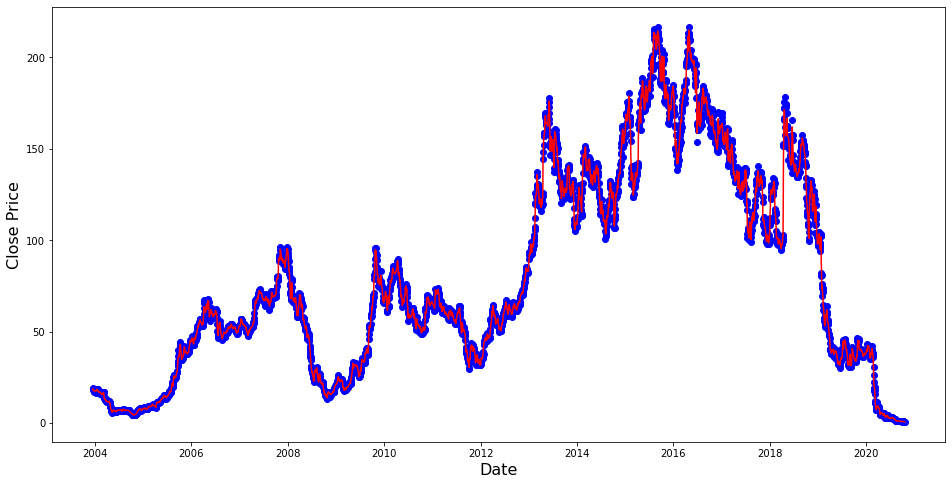

In [68]:
#%matplotlib inline
plt.figure(figsize=(16,8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price',fontsize=16)
plt.scatter(df.Date,df.Close,color='blue')

plt.plot(df.Date, model.predict(X),color='red')
